In [2]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# 1. 데이터 불러오기
# 절대경로
path = "C:\study\_bike\\"
# 상대경로
# path = ".\_bike\\"

# index_col = 0 은 0번째 있는 id 를 index로 구분해줌 
train_csv = pd.read_csv(path+ "train.csv",index_col=0)
test_csv = pd.read_csv(path+"test.csv",index_col=0)
submission = pd.read_csv(path + "sampleSubmission.csv",index_col=0)

In [4]:
# 해야할것 1. train 의 casual, registered 칼럼 삭제
#  2. y 칼럼인 count 분리
print(train_csv.columns)
print(train_csv.shape)
print(test_csv.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
(10886, 11)
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')


In [5]:
# 결측치 이상치를 확인해보기위한 카운트 조회
print(train_csv.info())

# 데이터셋을 결측치가 없는 데이터셋으로 초기화 
# 결측치 열 제거 
train_csv = train_csv.dropna(axis=0)
# 
train_csv = train_csv.drop(["casual"],axis=1)
train_csv = train_csv.drop(["registered"],axis=1)
# 결측치확인
train_csv.isnull().any()
print(train_csv.shape)
print(train_csv.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6+ KB
None
(10886, 9)
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count'],
      dtype='object')


In [6]:
# 데이터 정리하기 x 
x = train_csv.drop(["count"],axis=1)

#  x는 이제 count 칼럼이 사라졌습니다!
print(x.head())
print(x.shape)

                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  
datetime                                  
2011-01-01 00:00:00        81        0.0  
2011-01-01 01:00:00        80        0.0  
2011-01-01 02:00:00        80        0.0  
2011-01-01 03:00:00        75        0.0  
2011-01-01 04:00:00        75        0.0  
(10886, 8)


In [7]:
# 데이터 정리하기 y
# count 칼럼만 가지고옵니다 이떄 train_csv 은 변형하지 않는게 포인트
y = train_csv["count"]
print(y.head())

print(y.shape)

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: count, dtype: int64
(10886,)


In [8]:
# 데이터를 분할하기

x_train, x_test, y_train,y_test = train_test_split(x,y,
                                                   train_size=0.7,
                                                   shuffle = True,
                                                   random_state=21
                                                   )

print(len(x_train))
print(len(x_test))

7620
3266


In [9]:
# 2. 모델구성

model = Sequential([
    
    Dense(10,input_dim = 8 ,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    Dense(10,activation="relu"),
    # 마지막 레이어는 통상 relu 넣지 않습니다. 히든레이어에 많이쓰임
    Dense(1),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [10]:
# 3.컴파일 + 훈련
model.compile(loss="mse",optimizer="adam")
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
191/191 [==============================] - 2s 4ms/step - loss: 51103.3633 - val_loss: 35158.1406
Epoch 2/100
191/191 [==============================] - 1s 4ms/step - loss: 31136.2305 - val_loss: 27608.4980
Epoch 3/100
191/191 [==============================] - 1s 4ms/step - loss: 26080.3027 - val_loss: 25701.5059
Epoch 4/100
191/191 [==============================] - 1s 4ms/step - loss: 25200.4902 - val_loss: 25673.2363
Epoch 5/100
191/191 [==============================] - 1s 4ms/step - loss: 25089.2773 - val_loss: 25436.6211
Epoch 6/100
191/191 [==============================] - 1s 4ms/step - loss: 24996.4297 - val_loss: 25425.9824
Epoch 7/100
191/191 [==============================] - 1s 4ms/step - loss: 24859.4746 - val_loss: 25620.3516
Epoch 8/100
191/191 [==============================] - 1s 4ms/step - loss: 24844.2012 - val_loss: 25264.7637
Epoch 9/100
191/191 [==============================] - 1s 4ms/step - loss: 24787.5137 - val_loss: 25222.5879
Epoch 10/100
191/19

In [11]:
# 성능평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))
# 평가 손실률 가져오기
loss = model.evaluate(x_test,y_test)
print("loss : ",loss)

y_predict =model.predict(x_test)
# print("=================")
# print(y_test)
# print(y_predict)
# print("=================")

print("RMSE : ",RMSE(y_test,y_predict))
print("R2 : ",r2_score(y_test,y_predict))

103/103 [==============================] - 0s 2ms/step - loss: 22792.3848
loss :  22792.384765625
RMSE :  150.971460862444
R2 :  0.2849033064744044


In [12]:
# 15. 저장
import pandas as pd
# 15-1.제출용를 predcit 로 뽑아냄
y_submit = model.predict(test_csv)
# 15-2 제출용의 카운트 칼럼에 y_submit 삽입
submission["count"] = y_submit
# 15-3 경로와 파일명 지정
submission.to_csv(path + "submission_0106.csv")

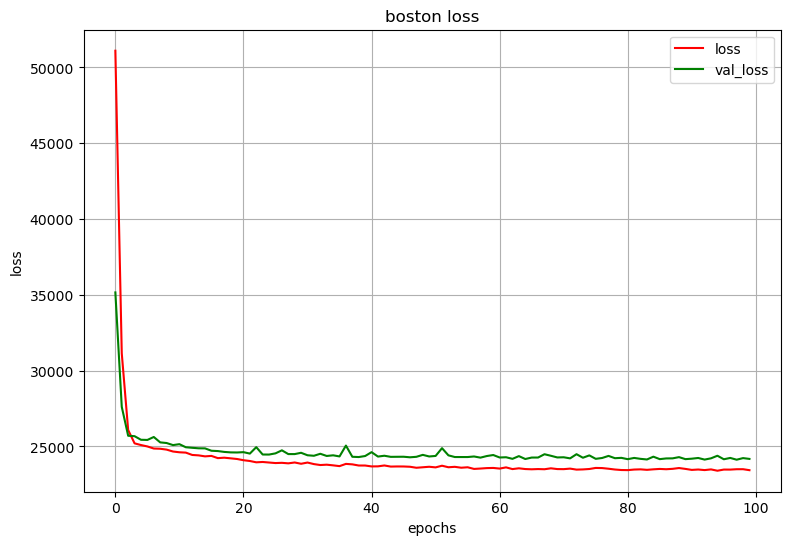

In [14]:
# 시각화
import matplotlib.pyplot as plt

# 필롯의 사이즈
plt.figure(figsize =(9,6))

plt.plot(hist.history["loss"],c ="red",label="loss")
plt.plot(hist.history["val_loss"],c="green",label="val_loss")
plt.grid() # 격자 표시
plt.xlabel("epochs") # x 라벨 표시 
plt.ylabel("loss") # y 라벨 표시
plt.title("boston loss") # 그래프의 타이틀 표시
plt.legend(loc = "upper right") # 그래프의 범주 표시
plt.show() # 그래프를 보여줘